In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
from qiskit import *
import time
import mapomatic as mm
from qiskit_ibm_runtime.fake_provider import FakeBelemV2, FakeManilaV2
from qiskit.circuit.library import *


In [4]:
from NoTODS import *

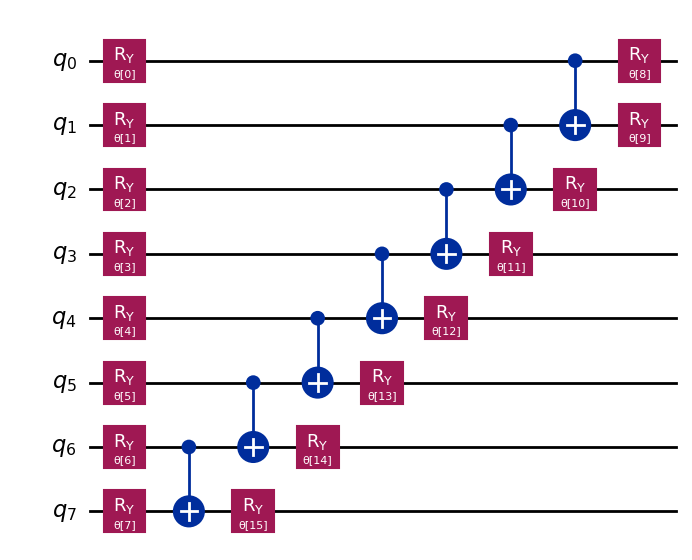

In [5]:
num_qubits=8
circ_test = RealAmplitudes(num_qubits, reps=1) 
circ_test = circ_test.decompose()

circ_test.remove_final_measurements(inplace=True)
circ_test.draw('mpl')

In [6]:
backendlist = [FakeBelemV2(), FakeManilaV2()]

In [7]:
backenddict = {}
for backend in backendlist:
    backenddict[backend.name] = backend

In [8]:
print(backenddict)

{'fake_belem': <qiskit_ibm_runtime.fake_provider.backends.belem.fake_belem.FakeBelemV2 object at 0x70c370b394b0>, 'fake_manila': <qiskit_ibm_runtime.fake_provider.backends.manila.fake_manila.FakeManilaV2 object at 0x70c370b3a9e0>}


In [9]:
Tau = [200]*len(backendlist)
print(Tau)

[200, 200]


In [10]:
obj = NoTODS(circ_test, backendlist, Tau)

In [11]:
cuts = obj._cut_circuit()
print(cuts)

{'subcircuits': [<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x70c2f8cb2890>, <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x70c2f8cb2d40>]}


In [12]:
model = obj.schedule()

Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 0.268783 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 4 rows and 4 columns.
All rows and columns eliminated.
Presolve time = 0.00 sec. (0.00 ticks)

Root node processing (before b&c):
  Real time             =    0.00 sec. (0.00 ticks)
Parallel b&c, 12 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.00 sec. (0.00 ticks)
objective: 0.256
status: OPTIMAL_SOLUTION(2)
  F0_0=1
  F1_1=1


In [13]:
model

['fake_belem', 'fake_manila']

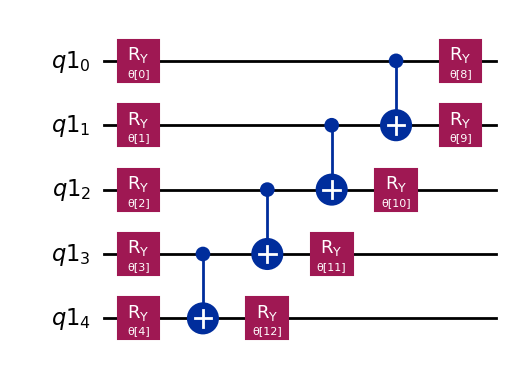

In [14]:
cuts['subcircuits'][0].draw('mpl')

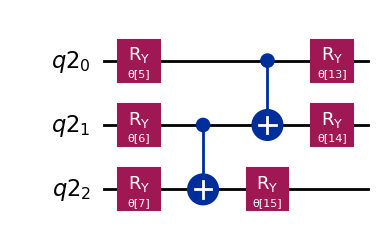

In [15]:
cuts['subcircuits'][1].draw('mpl')

In [16]:
tran_qc = []
for i in range(len(cuts['subcircuits'])):
    tran_qc.append(transpile(cuts['subcircuits'][i], backenddict[model[i]], optimization_level=0))
    small_qc = mm.deflate_circuit(tran_qc[i])
    layouts = mm.matching_layouts(small_qc, backenddict[model[i]])
    scores = mm.evaluate_layouts(small_qc, layouts, backenddict[model[i]])
    layout = scores[0][0]
    # best_qc = transpile(small_qc, backenddict[model[i]], initial_layout=layout)
    # print("bestqc", i)
    # print(best_qc)

In [18]:
# from qiskit.visualization import plot_circuit_layout
# plot_circuit_layout(best_qc, backenddict['fake_manila'])